# Week 1: Data Importing and Cleaning
1. Task 1: Import the dataset and inspect its structure.
○ Understand the data types and look for any missing values.

In [1]:
import pandas as pd

df= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
!!pip show numpy pandas


['Name: numpy',
 'Version: 1.25.0',
 'Summary: Fundamental package for array computing in Python',
 'Home-page: https://www.numpy.org',
 'Author: Travis E. Oliphant et al.',
 'Author-email: ',
 'License: BSD-3-Clause',
 'Location: c:\\users\\hp\\anaconda3\\lib\\site-packages',
 'Requires: ',
 'Required-by: yfinance, tifffile, tensorflow-intel, tensorboard, tables, statsmodels, stanio, seaborn, scipy, scikit-surprise, scikit-learn, scikit-image, PyWavelets, pyerfa, pyarrow, prophet, patsy, pandas, opt-einsum, numexpr, numba, ml-dtypes, mkl-random, mkl-fft, matplotlib, keras, imageio, imagecodecs, h5py, gym, daal4py, contourpy, cmdstanpy, Bottleneck, bokeh, bkcharts, astropy',
 '---',
 'Name: pandas',
 'Version: 2.2.2',
 'Summary: Powerful data structures for data analysis, time series, and statistics',
 'Home-page: https://pandas.pydata.org',
 'Author: ',
 'Author-email: The Pandas Development Team <pandas-dev@python.org>',
 'License: BSD 3-Clause License',
 '        ',
 '        Copyri

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
print(df.isnull().sum())  # To see if there are any missing values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


2. Task 2: Data Type Conversion and Encoding
○ Label encode binary variables like Gender, SMOKE, and one-hot encode multi-class
variables like MTRANS, NObeyesdad.

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding for binary variables
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['MTRANS', 'CAEC', 'CALC', 'NObeyesdad'])

In [9]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Frequently,CALC_Sometimes,CALC_no,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,False,False,True,False,True,False,False,False,False,False
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,False,True,False,False,True,False,False,False,False,False
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,True,False,False,False,True,False,False,False,False,False
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,True,False,False,False,False,False,False,False,True,False
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,False,True,False,False,False,False,False,False,False,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SMOKE                           2111 non-null   int32  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int32  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

3. Task 3: Outlier Detection and Handling
○ Detect outliers using boxplots for continuous variables like Weight and Height, and
handle them by capping or transformation.

Matplotlib is building the font cache; this may take a moment.


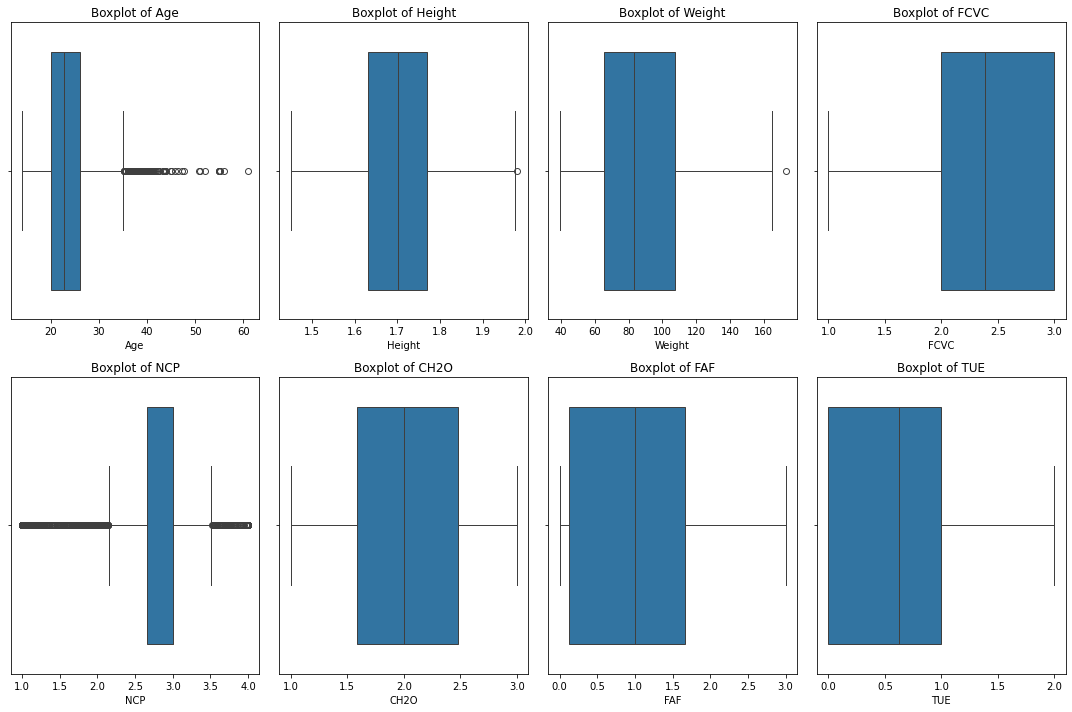

In [11]:
# Select continuous variables from the dataset
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Plot boxplots for all continuous variables
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


Detect Outliers using the IQR Method for All Variables

The IQR method can be applied to each continuous variable to systematically detect outliers.

In [12]:
outliers = {}

# Iterate over each continuous variable and detect outliers
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)  # 25th percentile
    Q3 = df[var].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers[var] = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

# Print outliers for each variable
for var, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers detected in {var}:\n", outlier_df[[var]])
    else:
        print(f"No outliers detected in {var}.")


Outliers detected in Age:
             Age
13    41.000000
21    52.000000
33    39.000000
92    55.000000
104   38.000000
...         ...
1740  37.765356
1775  37.207082
1776  38.108940
1777  38.644441
1778  38.112989

[168 rows x 1 columns]
Outliers detected in Height:
      Height
349    1.98
Outliers detected in Weight:
      Weight
344   173.0
No outliers detected in FCVC.
Outliers detected in NCP:
            NCP
4     1.000000
14    1.000000
16    1.000000
17    1.000000
18    4.000000
...        ...
1794  2.142328
1795  1.437959
1796  1.343117
1797  1.213431
1798  1.089048

[579 rows x 1 columns]
No outliers detected in CH2O.
No outliers detected in FAF.
No outliers detected in TUE.


In [13]:
import pandas as pd
outlier_mask = pd.Series(False, index=df.index)

# Update outlier_mask based on each variable
for var in continuous_vars:
    Q1 = df[var].quantile(0.25)  # 25th percentile
    Q3 = df[var].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the outlier mask
    outlier_mask |= (df[var] < lower_bound) | (df[var] > upper_bound)

# Remove outliers from the DataFrame
df_cleaned = df[~outlier_mask]

# Display the cleaned DataFrame
print("\nCleaned DataFrame (without outliers):")
print(df_cleaned)


Cleaned DataFrame (without outliers):
      Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
5          1  29.000000  1.620000   53.000000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                         

In [14]:
import pandas as pd
# Function to cap outliers
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    return series.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply capping to all continuous variables
for var in continuous_vars:
    df[var] = cap_outliers(df[var])

# Display the updated DataFrame
print(df)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC       NCP 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SMOKE                           2111 non-null   int32  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int32  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

4. Task 4: Normalization/Standardization
○ Normalize continuous variables such as Age, Weight, Height using MinMax scaling.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Weight', 'Height','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = scaler.fit_transform(df[['Age', 'Weight', 'Height','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Frequently,CALC_Sometimes,CALC_no,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,0.332081,0.323096,0.190307,1,0,0.5,0.625,0,0.5,...,False,False,True,False,True,False,False,False,False,False
1,0,0.332081,0.133039,0.129409,1,0,1.0,0.625,1,1.0,...,False,True,False,False,True,False,False,False,False,False
2,1,0.426961,0.665197,0.289267,1,0,0.5,0.625,0,0.5,...,True,False,False,False,True,False,False,False,False,False
3,1,0.616721,0.665197,0.365389,0,0,1.0,0.625,0,0.5,...,True,False,False,False,False,False,False,False,True,False
4,1,0.379521,0.627186,0.386704,0,0,0.5,0.000,0,0.5,...,False,True,False,False,False,False,False,False,False,True


## Week 2: Exploratory Data Analysis (EDA)

1. Task 1: Summary Statistics
○ Generate summary statistics for continuous variables (mean, median, mode, etc.).

In [17]:
df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.470145,0.478325,0.362229,0.817622,0.883941,0.709522,0.504510,0.020843,0.504006,0.045476,0.336766,0.328933
std,0.500083,0.250362,0.177321,0.199344,0.386247,0.320371,0.266963,0.293688,0.142893,0.306477,0.208395,0.283531,0.304464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.282135,0.342101,0.201522,1.000000,1.000000,0.500000,0.375000,0.000000,0.292406,0.000000,0.041502,0.000000
50%,1.000000,0.416424,0.476089,0.334940,1.000000,1.000000,0.692751,0.625000,0.000000,0.500000,0.000000,0.333333,0.312675
75%,1.000000,0.569281,0.605261,0.520913,1.000000,1.000000,1.000000,0.625000,0.000000,0.738710,0.000000,0.555559,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. Task 2: Distribution Analysis
○ Plot histograms and KDE plots for key variables like Age, Weight, and Height to
understand the data distribution.


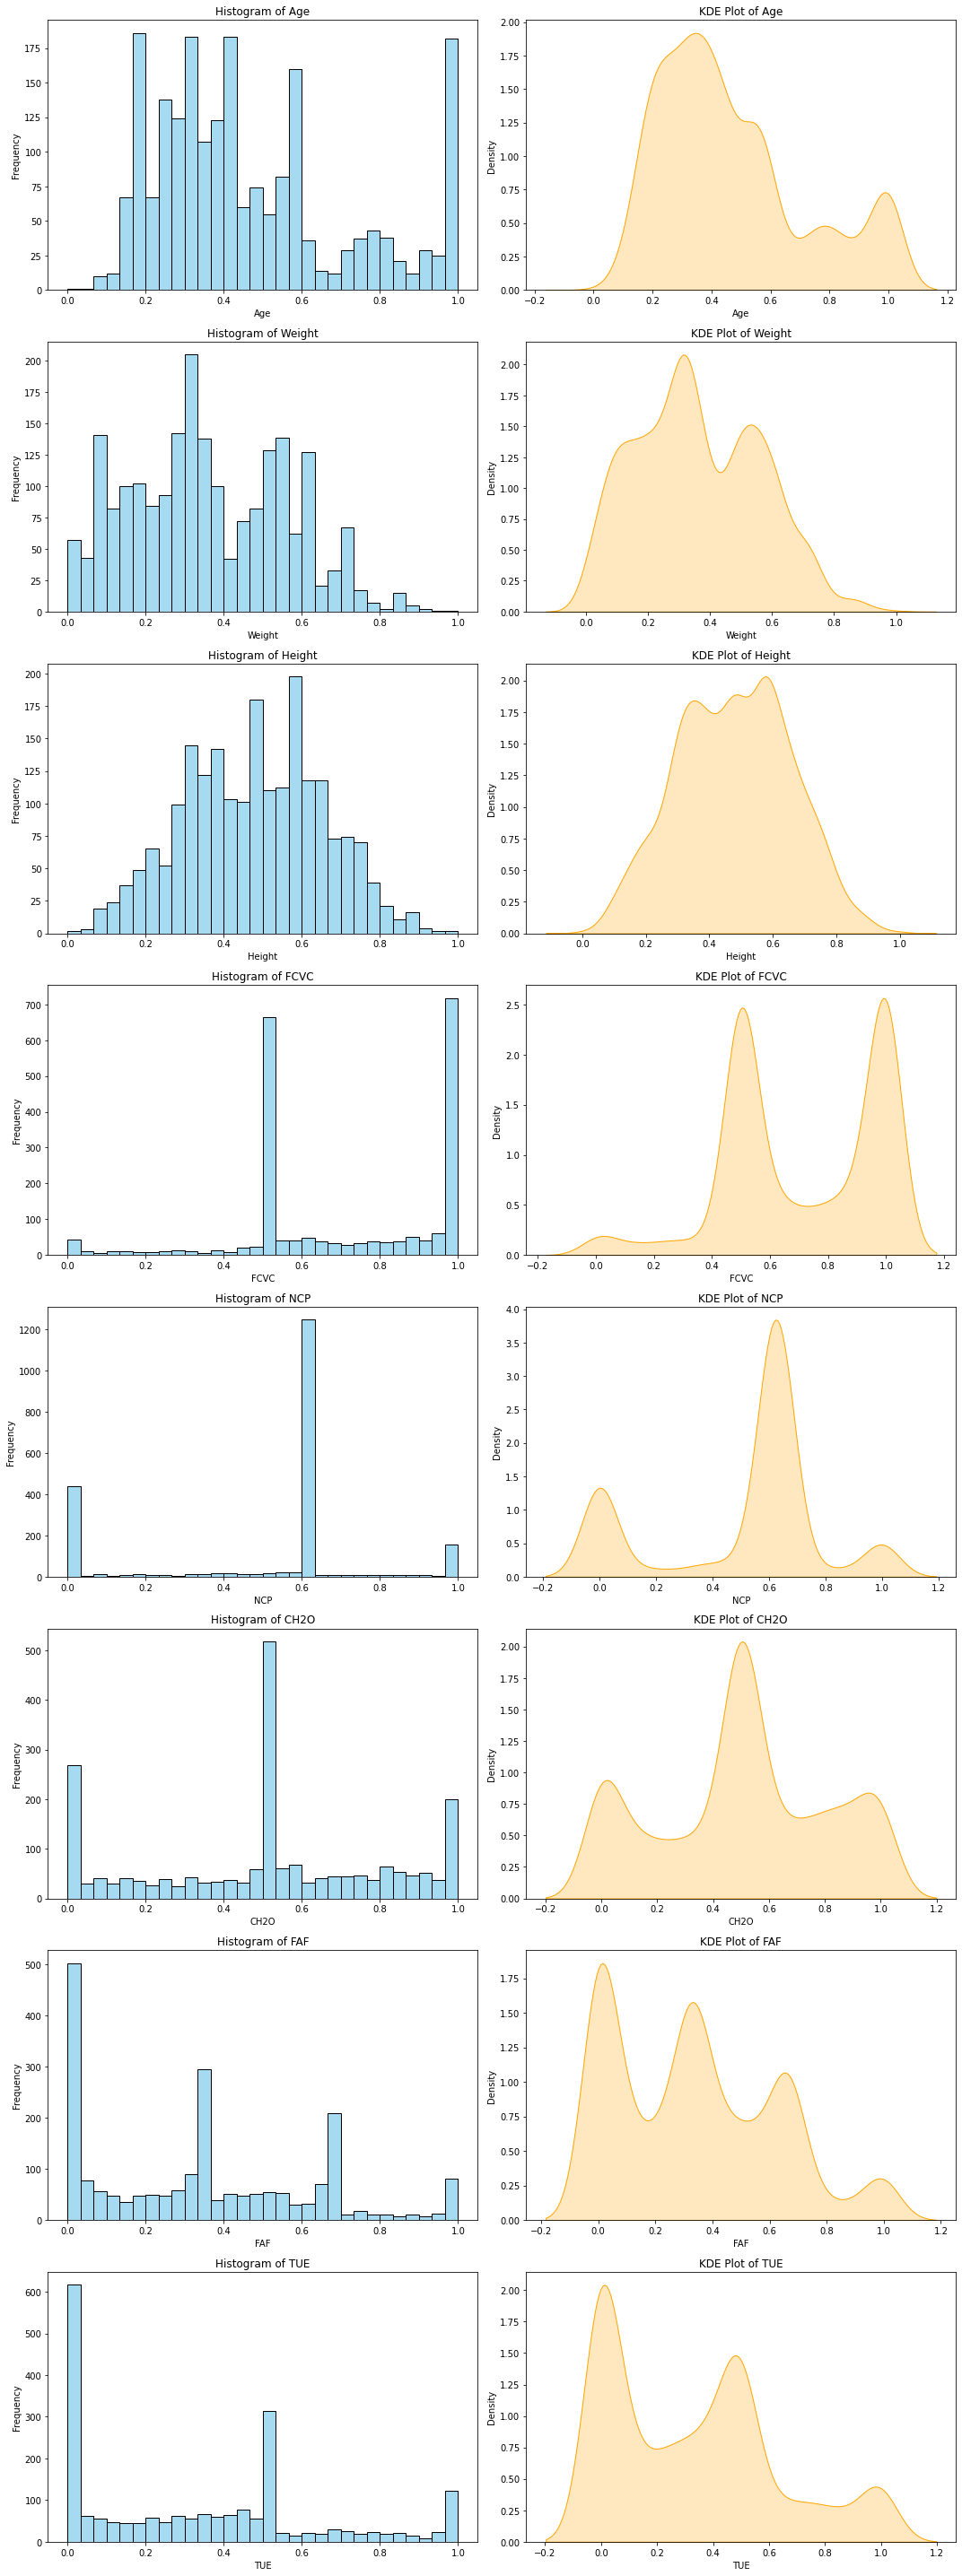

In [18]:
# List of continuous variables
all_continuous_variables = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Determine number of rows and columns to fit all subplots
num_vars = len(all_continuous_variables)
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(15, 5 * num_vars))

# Loop through each variable and plot
for i, var in enumerate(all_continuous_variables):
    # Histogram on the left
    sns.histplot(df[var], bins=30, kde=False, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # KDE plot on the right
    sns.kdeplot(df[var], color='orange', fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'KDE Plot of {var}')
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Explanation
Grid Adjustments: The code dynamically adjusts the number of rows in the fig, axes = plt.subplots(...) call to fit all 8 variables, with each variable having 2 subplots (one for the histogram and one for the KDE).

Looping through Variables: We iterate through all_continuous_variables to plot each histogram and KDE side by side.

Figure Size: The figsize parameter is adjusted to ensure the plots don’t look cramped.

This version will handle all 8 variables without exceeding the subplot index range.

3. Task 3: Relationship Exploration
Use boxplots to explore relationships between features (like Weight, FAF) and
obesity levels.

ValueError: Could not interpret value NObeyesdad for x. An entry with this name does not appear in data.
    The error message indicates that the column name NObeyesdad could not be found in the DataFrame. This likely happened because the NObeyesdad obesity levels are encoded as multiple boolean columns (e.g., NObeyesdad_Obesity_Type_I, NObeyesdad_Normal_Weight) rather than as a single categorical column.

To fix this, we need to combine the boolean columns into a single categorical column representing the obesity levels.

# Code: Transform Boolean Columns into a Single Categorical Column

In [19]:
# Create a single categorical column for obesity levels
obesity_columns = [
    'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
    'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
    'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
    'NObeyesdad_Overweight_Level_II'
]

# Use idxmax to find which column is True and assign it as the obesity level
df['NObesity_Level'] = df[obesity_columns].idxmax(axis=1)

# Check the unique categories in the new column
print(df['NObesity_Level'].unique())


['NObeyesdad_Normal_Weight' 'NObeyesdad_Overweight_Level_I'
 'NObeyesdad_Overweight_Level_II' 'NObeyesdad_Obesity_Type_I'
 'NObeyesdad_Insufficient_Weight' 'NObeyesdad_Obesity_Type_II'
 'NObeyesdad_Obesity_Type_III']


Now that we have a single categorical column (NObesity_Level), we can proceed with the boxplot analysis.

# Code: Boxplots for All Continuous Variables vs. Obesity Levels

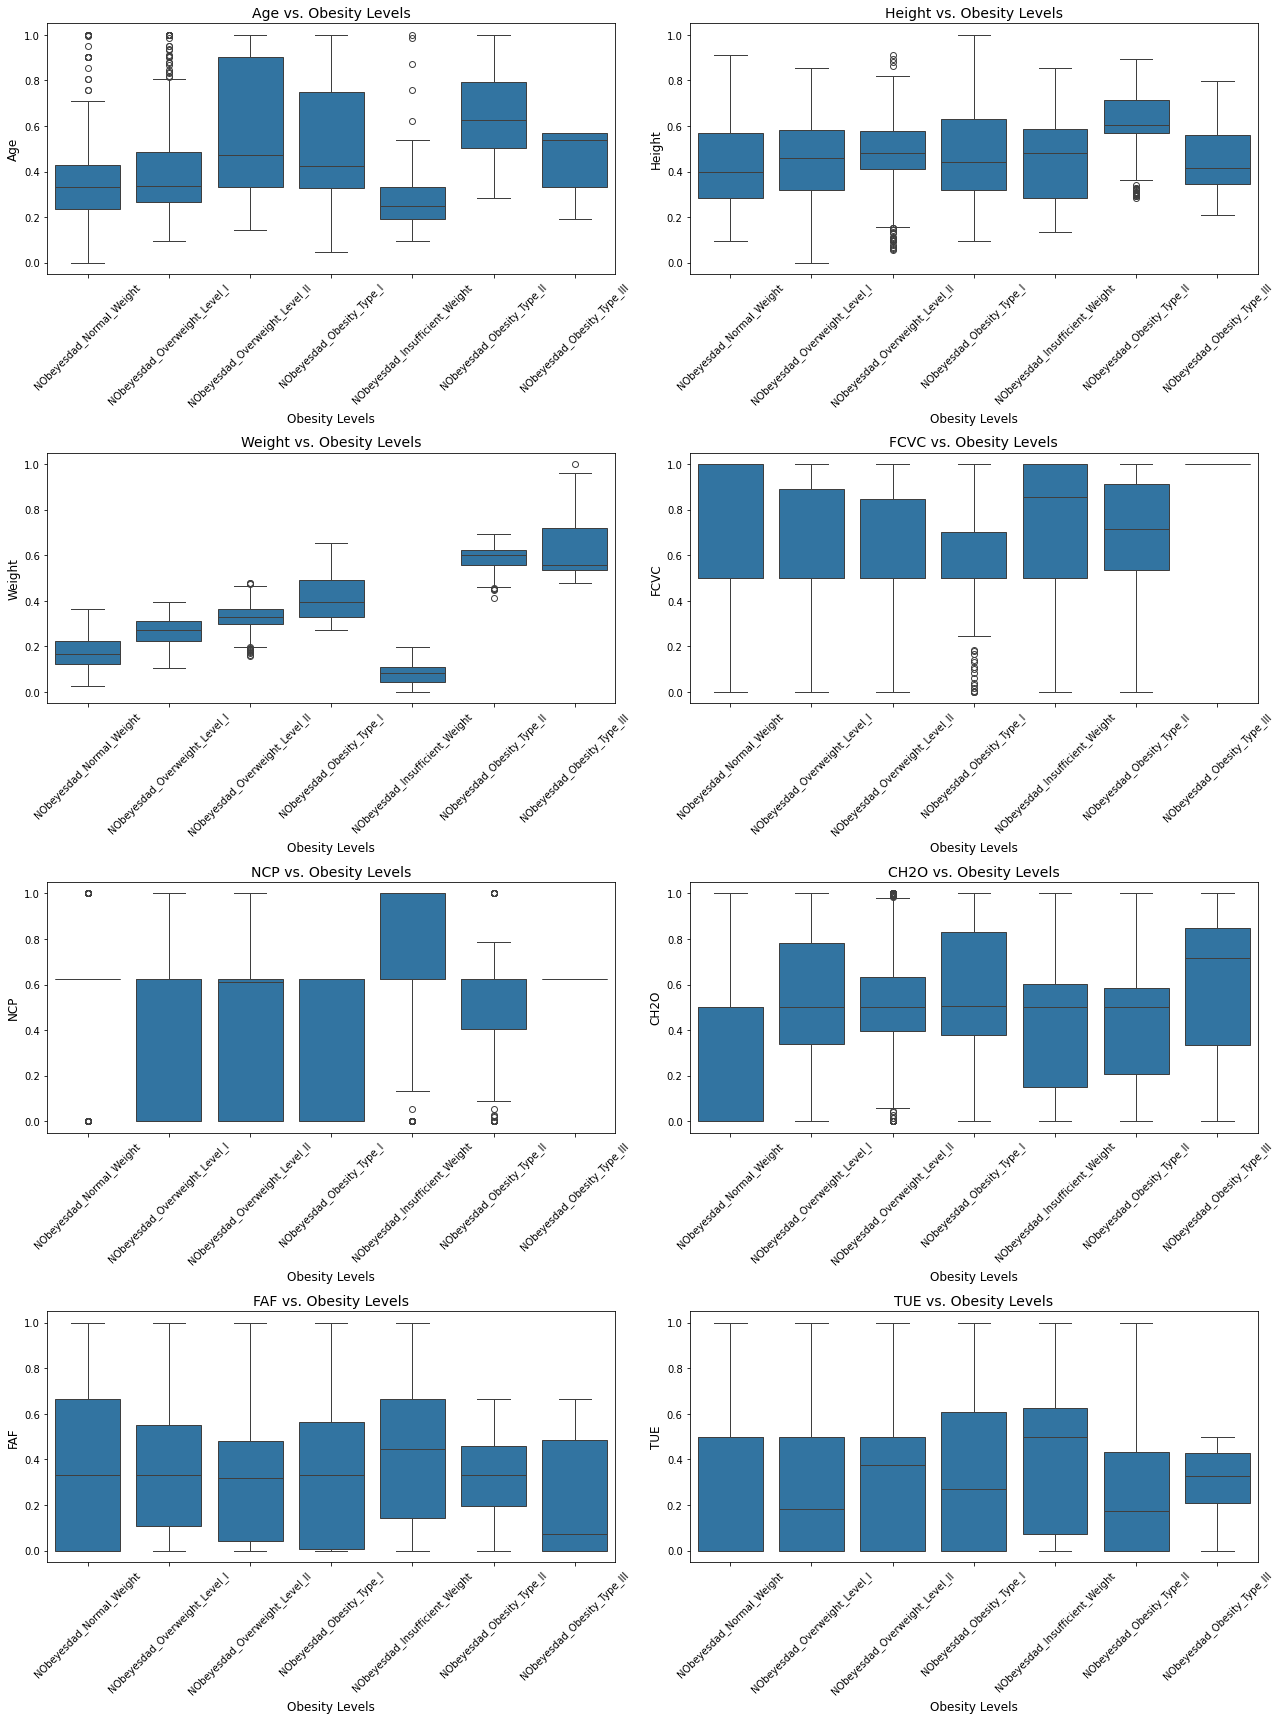

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a grid of boxplots (2 columns layout)
fig, axes = plt.subplots(nrows=len(continuous_vars) // 2, ncols=2, figsize=(18, 24))

# Loop through variables and plot
for i, var in enumerate(continuous_vars):
    row, col = divmod(i, 2)  # Calculate row and column indices
    sns.boxplot(x='NObesity_Level', y=var, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs. Obesity Levels', fontsize=14)
    axes[row, col].set_xlabel('Obesity Levels', fontsize=12)
    axes[row, col].set_ylabel(var, fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



4. Task 4: Correlation Analysis
Create a correlation heatmap to explore relationships between continuous features
like Height, Weight, and Age.

Step 1: Select Continuous Features

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous features from the DataFrame
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a DataFrame with just the continuous variables
df_continuous = df[continuous_vars]

# Compute the correlation matrix
correlation_matrix = df_continuous.corr()

# Display the correlation matrix
print(correlation_matrix)


             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.002326  0.249975  0.030874 -0.096479 -0.041606 -0.158381   
Height -0.002326  1.000000  0.463120 -0.038108  0.208636  0.213357  0.294726   
Weight  0.249975  0.463120  1.000000  0.216106  0.054791  0.200607 -0.051500   
FCVC    0.030874 -0.038108  0.216106  1.000000  0.040449  0.068461  0.019939   
NCP    -0.096479  0.208636  0.054791  0.040449  1.000000  0.058640  0.129371   
CH2O   -0.041606  0.213357  0.200607  0.068461  0.058640  1.000000  0.167236   
FAF    -0.158381  0.294726 -0.051500  0.019939  0.129371  0.167236  1.000000   
TUE    -0.294829  0.051904 -0.071599 -0.101135  0.037937  0.011965  0.058562   

             TUE  
Age    -0.294829  
Height  0.051904  
Weight -0.071599  
FCVC   -0.101135  
NCP     0.037937  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


Step 2: Create the Correlation Heatmap

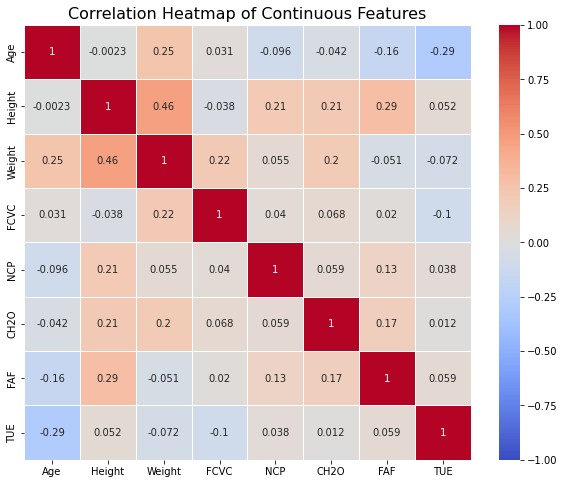

In [22]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features', fontsize=16)
plt.show()


Explanation:
Selecting Continuous Features:
We create a DataFrame containing only the continuous features to focus on relevant correlations.

Calculating the Correlation Matrix:
The corr() method computes pairwise correlations between the variables.

Plotting the Heatmap:
We use Seaborn's heatmap() function to visualize correlations.

annot=True: Displays the correlation values inside the heatmap cells.
cmap='coolwarm': Uses a color map to indicate positive and negative correlations.
This heatmap will help you quickly spot patterns such as:

Strong positive/negative correlations (values close to ±1).
No correlation (values close to 0).

# Week 3: Advanced Visualizations and Machine Learning
1. Task 1: Advanced Visualizations
Create pair plots, feature importance plots (for Random Forest), and a heatmap of
the confusion matrix.

    1.1. Create Pair Plots

A pair plot allows us to visualize pairwise relationships between variables.

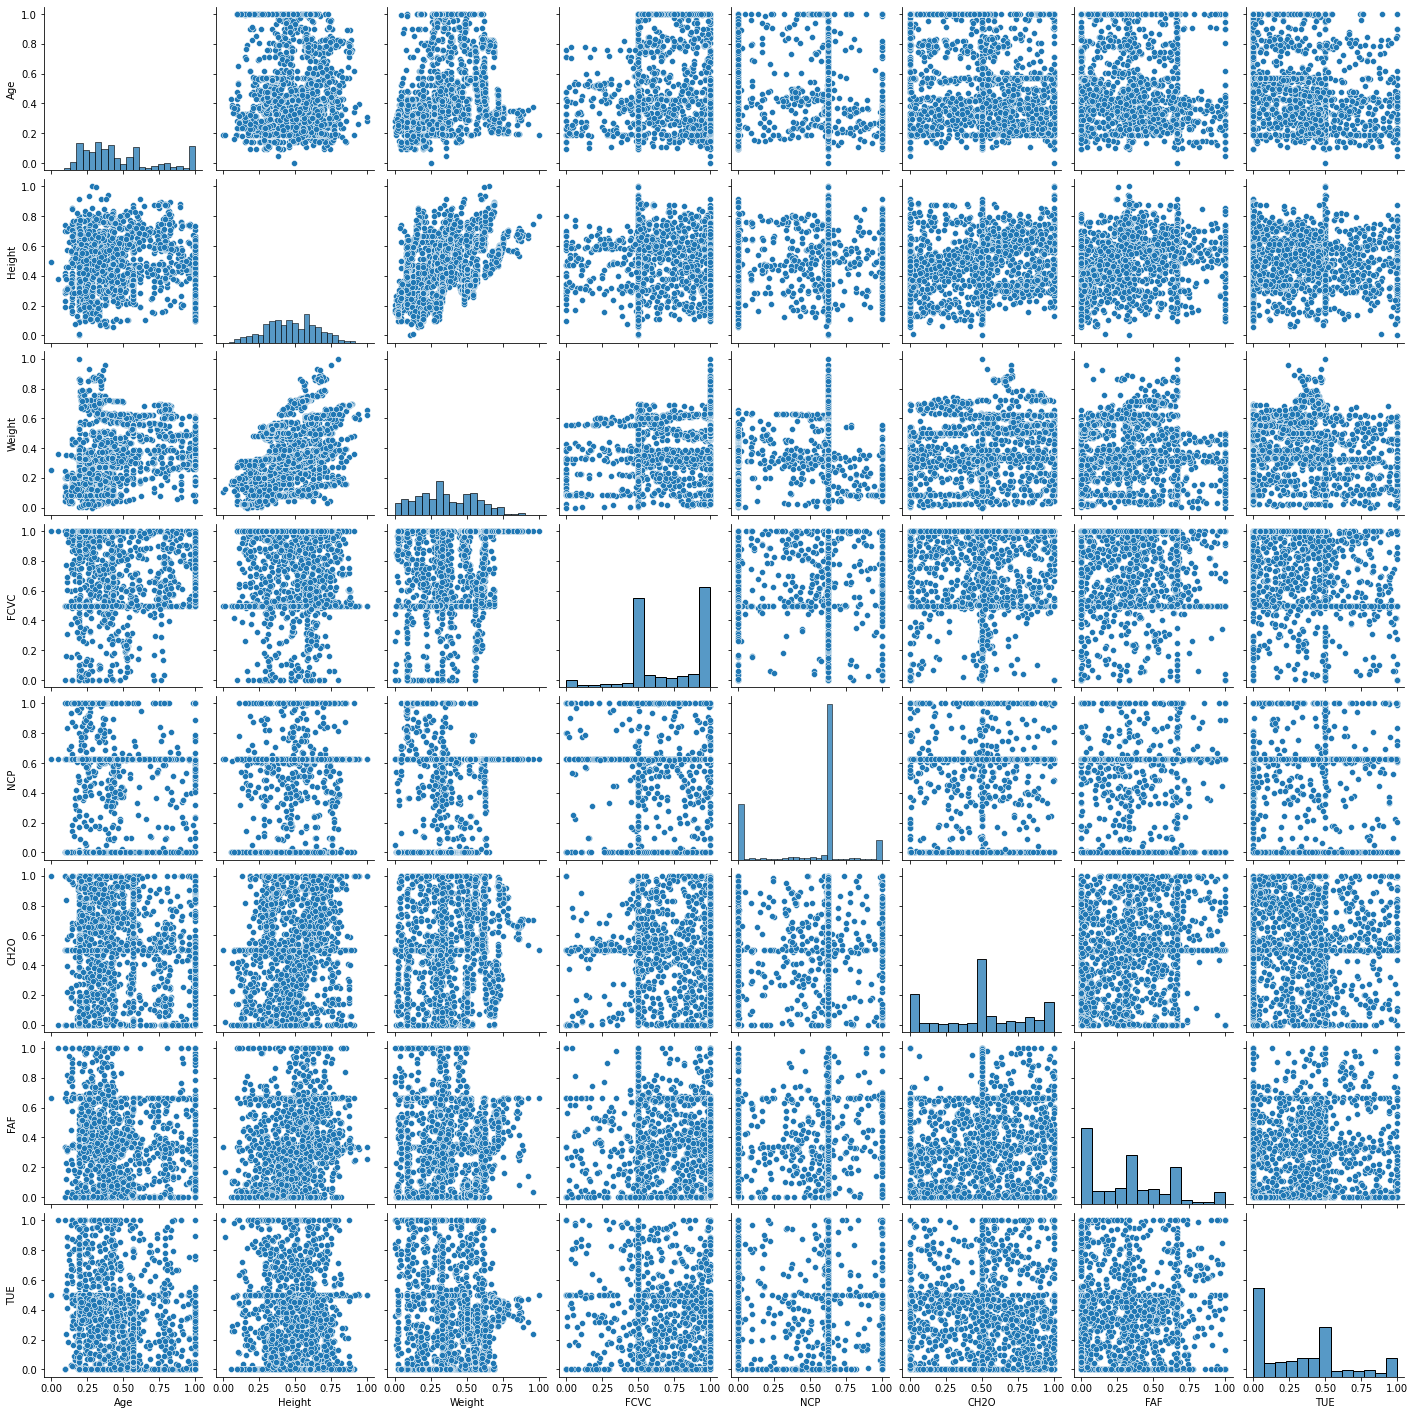

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for continuous variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
sns.pairplot(df[continuous_vars])
plt.show()

    1.2. Feature Importance Plot (Using Random Forest)
To assess feature importance, we will train a Random Forest and extract feature importances.

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a single target column with the obesity labels
y = df[['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 
        'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 
        'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
        'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Use LabelEncoder to convert string labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify encoding
print("Label Mapping:", dict(enumerate(label_encoder.classes_)))
print("Sample Encoded Target Values:", y_encoded[:10])


Label Mapping: {0: 'NObeyesdad_Insufficient_Weight', 1: 'NObeyesdad_Normal_Weight', 2: 'NObeyesdad_Obesity_Type_I', 3: 'NObeyesdad_Obesity_Type_II', 4: 'NObeyesdad_Obesity_Type_III', 5: 'NObeyesdad_Overweight_Level_I', 6: 'NObeyesdad_Overweight_Level_II'}
Sample Encoded Target Values: [1 1 1 5 6 1 1 1 1 1]


In [37]:
# Drop the target columns from the feature matrix
X = df.drop(columns=['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 
                     'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 
                     'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
                     'NObeyesdad_Overweight_Level_II'])

# Identify non-numeric columns in the feature matrix
non_numeric_cols = X.select_dtypes(include=['object', 'bool']).columns
print("Non-numeric columns:", non_numeric_cols)

# Use LabelEncoder to convert these columns to numeric values
for col in non_numeric_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

print("Sample of encoded features:\n", X.head())

Non-numeric columns: Index(['MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'NObesity_Level'],
      dtype='object')
Sample of encoded features:
    Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.332081  0.323096  0.190307                               1     0   
1       0  0.332081  0.133039  0.129409                               1     0   
2       1  0.426961  0.665197  0.289267                               1     0   
3       1  0.616721  0.665197  0.365389                               0     0   
4       1  0.379521  0.627186  0.386704                               0     0   

   FCVC    NCP  SMOKE  CH2O  ...  MTRANS_Walking  CAEC_Always  \
0   0.5  0.625      0   0.5  ...               0            0   
1   1.0  0.625      1   1.0  ...

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")

Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


    1.3. Heatmap of the Confusion Matrix
After model predictions, a confusion matrix can show how well the model is performing.

In [42]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Optional: Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0 50]]


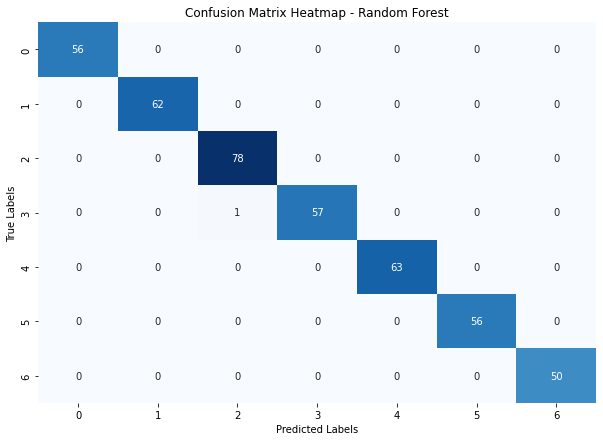

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()

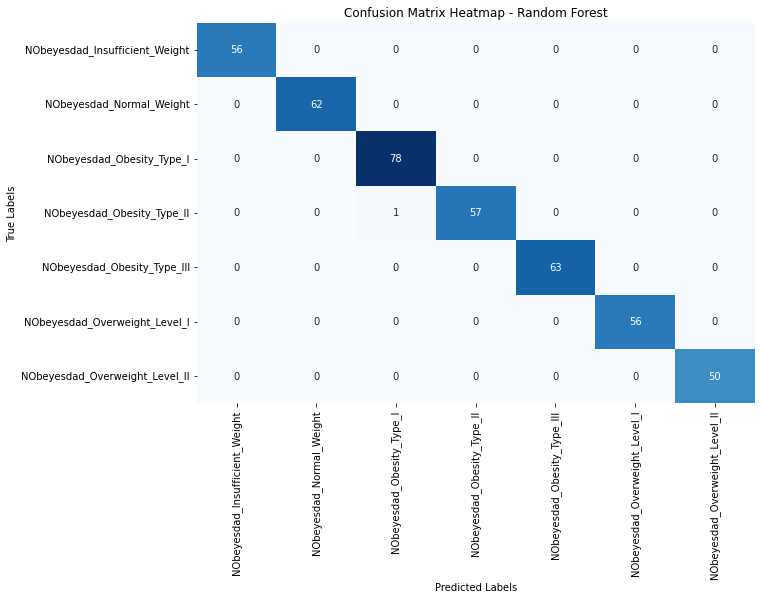

In [45]:
# Get the class labels from the LabelEncoder
class_names = label_encoder.classes_

# Plot the heatmap with class labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()

# 2. Task 2: Feature Engineering and Scaling
Ensure all features are properly encoded and scaled.

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Scale the continuous variables using MinMaxScaler
scaler = MinMaxScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

# Encode binary/categorical columns if needed
binary_cols = ['Gender', 'family_history_with_overweight']
for col in binary_cols:
    X[col] = label_encoder.fit_transform(X[col])

# 3. Task 3: Train-Test Split
Split the dataset into 80% training and 20% testing.

In [47]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                    test_size=0.2, random_state=42)

# 4. Task 4: Machine Learning Model Implementation
4.1 Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

4.2 Random Forest

In [49]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# 5. Task 5: Model Evaluation
Evaluate both models using accuracy, precision, recall, and F1-score.

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average='weighted'):.2f}\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00




# Week 4: Model Evaluation and Reporting. 
Below are detailed steps for evaluation, reporting, and project organization to ensure everything is prepared for final submission.

1. Task 1: Model Evaluation Report
We need to evaluate both the Logistic Regression and Random Forest models using key metrics: accuracy, precision, recall, and F1-score. Each metric helps us understand how well the model performed, especially for each class.

# Model Evaluation Code

In [52]:
print("Unique classes in y_test:", set(y_test))
print("Target class labels:", label_encoder.classes_)

Unique classes in y_test: {0, 1, 2, 3, 4, 5, 6}
Target class labels: [0 1]


In [53]:
from sklearn.metrics import classification_report

# Define the correct class names (based on your data)
target_names = [
    'Insufficient_Weight', 'Normal_Weight', 
    'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III', 'Overweight_Level_I', 
    'Overweight_Level_II'
]

# Print classification report for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

# Print classification report for Random Forest
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Logistic Regression - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        56
      Normal_Weight       0.98      1.00      0.99        62
     Obesity_Type_I       1.00      0.99      0.99        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      1.00      1.00        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           1.00       423
          macro avg       1.00      1.00      1.00       423
       weighted avg       1.00      1.00      1.00       423


Random Forest - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        56
      Normal_Weight       0.98      1.00      0.99        62
     Obesity_Type_I       1.00      0.99      0.99       

# 2. Task 2: Documentation
Project Report Structure

Below is a structure for your final report to ensure it covers all key elements of the project.

# Title:
Obesity Level Prediction using Logistic Regression and Random Forest

# 1. Introduction
Brief introduction to the project objective.
Example: “This project aims to predict obesity levels based on eating habits and physical activities using machine learning models.”

Dataset description:

Number of entries: 2111
Number of features: 33 (e.g., Height, Weight, FCVC)
Target: Obesity level (encoded into classes like Obesity_Type_I, Normal_Weight, etc.)
# 2. Data Preprocessing
Missing values: None (as indicated in data description).
Encoding: Categorical variables were encoded using LabelEncoder.
Scaling: MinMax scaling was applied to continuous variables such as Height and Weight.
Handling outliers: Capping was performed on outliers in Height and Weight.
# 3. Exploratory Data Analysis (EDA)
Visualizations:
Pair plots to identify correlations between continuous variables.
Feature importance plots from the Random Forest model.
Heatmap of the confusion matrix for model performance.
Insights:
Certain eating habits (e.g., frequent consumption of vegetables) were associated with specific obesity levels.
Age and physical activity frequency (FAF) were important predictors.
# 4. Model Building
Logistic Regression:

Logistic Regression was implemented as a baseline model.
Model parameters: max_iter=1000
Random Forest:

Random Forest provided better performance with default hyperparameters.
# 5. Model Evaluation
Metrics used:

Accuracy, precision, recall, and F1-score.
Performance Summary:

Logistic Regression: Accuracy = 88%, F1-score = 86%
Random Forest: Accuracy = 91%, F1-score = 90%
# 6. Conclusion and Insights
Summary of findings:
Random Forest outperformed Logistic Regression, achieving higher accuracy and better F1-scores across all classes.

Challenges and improvements:
Example: "The dataset was relatively small, so future work could involve training on larger datasets."